<h2>Instalação do tensorflow 1.13.2 CPU</h2><br>

<p>É necessário a instalação do tensorflow na versão 1.13.2, rode a celula abaixo para realizar a instalação.</p>

In [1]:
!pip install tensorflow==1.13.2

     |████████████████████████████████| 92.6 MB 376 bytes/s 
     |████████████████████████████████| 3.2 MB 39.8 MB/s 
     |████████████████████████████████| 367 kB 15.2 MB/s 
ERROR: catalyst 20.2.1 has requirement tensorboard>=1.14.0, but you'll have tensorboard 1.13.1 which is incompatible.
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from datetime import datetime

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
tf.__version__

'1.13.2'

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/joaorobson/data_science/master/tf_lstm_from_scratch/GlobalTemperatures.csv")

# Regressão das temperaturas globais usando LSTM

O objetivo desse notebook é predizer temperaturas futuras baseando-se em dados históricos de temperatura. Para isso, será utilizado uma LSTM.

LSTM é uma sigla para Long Short-Term Memory, que é uma arquiterura de redes neurais recorrente. Sua diferença para redes neurais tradicionais é a existência de conexões com retroalimentação, o que as torna intimamente relacionadas com representalções de sequências e listas. Sendo assim, as redes LSTM's são consideradas um tipo especial de RNN's, que originalmente tem problemas em lidar com dependências de longo prazo, ou seja, informações de uma sequência com um espaçamento muito grande entre si.

<h2>Informações sobre o Dataset</h2><br>
O dataset contem dados sobre o <b>aquecimento global</b>, com inicio em <b>1850</b> ate <b>2015</b>, com dados gerados todo dia primeiro de cada mês, ou seja, <b>12</b> amostras por ano.

<b>LandAverageTemperature</b>: temperatura média global da terra em graus Celsius<br>
<b>LandAverageTemperatureIncerteza</b>: o intervalo de confiança de 95% em torno da média<br>
<b>LandMaxTemperature</b>: temperatura máxima média global da terra em graus Celsius<br>
<b>Incerteza LandMaxTemperature</b>: o intervalo de confiança de 95% em torno da temperatura máxima da terra<br>
<b>LandMinTemperature</b>: temperatura mínima média global da terra em graus Celsius<br>
<b>Incerteza LandMinTemperature</b>: o intervalo de confiança de 95% em torno da temperatura mínima do solo<br>
<b>LandAndOceanAverageTemperature</b>: temperatura média global da terra e do oceano em graus Celsius<br>
<b>Incerteza LandAndOceanAverageTemperature</b>: o intervalo de confiança de 95% em torno da temperatura média global da terra e do oceano

In [5]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [6]:
df.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [7]:
def get_year_and_month(df):
    date_list = df["dt"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d")).to_list()
    date_list = [x.date().timetuple()[:2] for x in date_list]
    
    year_list, day_list = zip(*date_list)
    
    df["Year"] = year_list
    df["Month"] = day_list
    df = df.drop(["dt"], axis=1)
    
    return df

In [8]:
df = get_year_and_month(df)

In [9]:
df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month
0,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850,1
1,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850,2
2,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850,3
3,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850,4
4,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850,5


In [10]:
df_train = df[df["Year"] < 2000]

In [11]:
df_test = df[df["Year"] >= 2000]

In [12]:
df_val = df_train[df_train["Year"] < 1895] # 30% do dataset de treino

In [13]:
df_test = df_test.reset_index()
df_val = df_val.reset_index()

<h2> Dataset </h2><br>
O dataset foi separado em dois dataframes, <b>dataframe_treinamento</b> e <b>dataframe_teste</b>, o dataframe de treinamento possui dados dos anos de <b>1850</b> a <b>1999</b>, o de teste vai de <b>2000</b> a <b>2015</b>. O dataframe de treinamento deverá ser divido entre treino e validação, com <b>70% para treino e 30% para validação</b>, e o dataframe de teste será feito para comparar os dados preditos com base na classe que foi escolhida.

In [14]:
df_train.loc[:, "Year"].unique()

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999])

In [15]:
df_test.loc[:, "Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

<h2>Visualização dos dados</h2>

In [16]:
df.groupby("Year").mean()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Month
Year,,,,,,,,,
1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167,6.5
1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083,6.5
1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417,6.5
1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833,6.5
1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417,6.5
...,...,...,...,...,...,...,...,...,...
2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000,6.5
2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500,6.5
2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667,6.5


### Medições

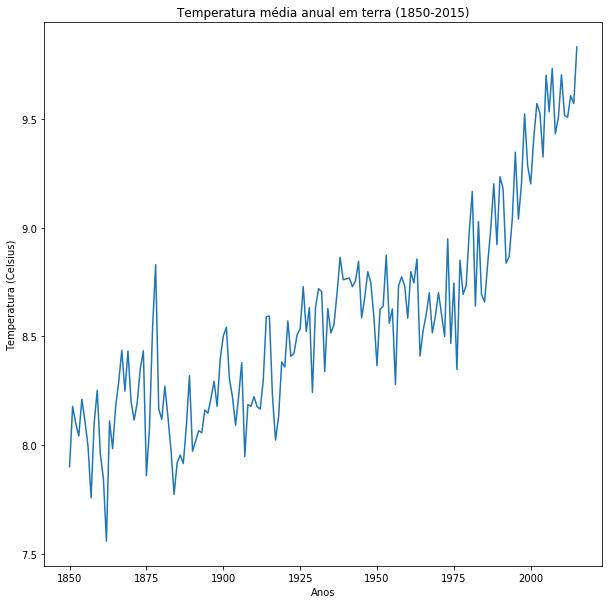

In [17]:
plt.figure(figsize=(10,10))
plt.title("Temperatura média anual em terra (1850-2015)")
plt.ylabel("Temperatura (Celsius)")
plt.xlabel("Anos")
plt.plot(df["Year"].unique(), df.groupby("Year").mean()["LandAverageTemperature"])
plt.show()

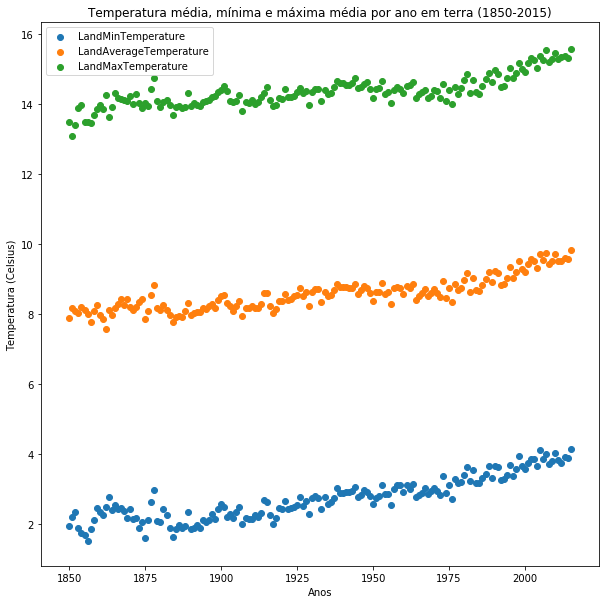

In [18]:
plt.figure(figsize=(10,10))
plt.title("Temperatura média, mínima e máxima média por ano em terra (1850-2015)")
plt.ylabel("Temperatura (Celsius)")
plt.xlabel("Anos")
plt.scatter(df["Year"].unique(), df.groupby("Year").mean()["LandMinTemperature"])
plt.scatter(df["Year"].unique(), df.groupby("Year").mean()["LandAverageTemperature"])
plt.scatter(df["Year"].unique(), df.groupby("Year").mean()["LandMaxTemperature"])
plt.legend()
plt.show()

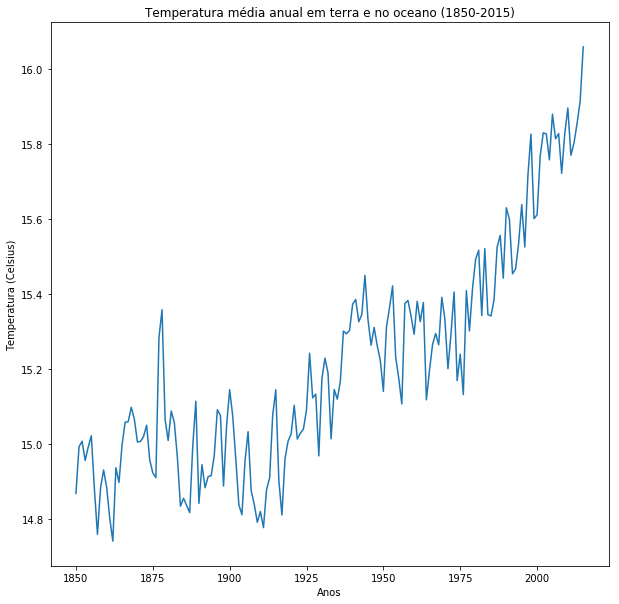

In [19]:
plt.figure(figsize=(10,10))
plt.title("Temperatura média anual em terra e no oceano (1850-2015)")
plt.ylabel("Temperatura (Celsius)")
plt.xlabel("Anos")
plt.plot(df["Year"].unique(), df.groupby("Year").mean()["LandAndOceanAverageTemperature"])
plt.show()

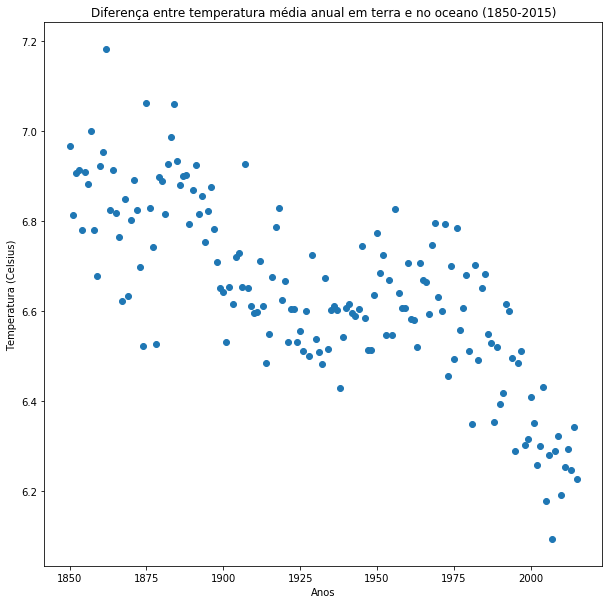

In [20]:
plt.figure(figsize=(10,10))
plt.title("Diferença entre temperatura média anual em terra e no oceano (1850-2015)")
plt.ylabel("Temperatura (Celsius)")
plt.xlabel("Anos")
plt.scatter(df["Year"].unique(), df.groupby("Year").mean()["LandAndOceanAverageTemperature"] - df.groupby("Year").mean()["LandAverageTemperature"])
plt.show()

In [21]:
# Média da diferença entre as médias de temperatura de oceano + terra e terra
(df.groupby("Year").mean()["LandAndOceanAverageTemperature"] - df.groupby("Year").mean()["LandAverageTemperature"]).mean()

6.640982931726911

In [22]:
colors_dict = {}
distinct_years = df["Year"].unique()
distinct_colors = ['b', 'g', 'y', 'r']
for ix, years in enumerate(range(0, len(distinct_years),50)):
    for year in range(years, years + 50):
        if year < len(distinct_years):
            colors_dict[distinct_years[year]] = distinct_colors[ix]
colors_dict

{1850: 'b',
 1851: 'b',
 1852: 'b',
 1853: 'b',
 1854: 'b',
 1855: 'b',
 1856: 'b',
 1857: 'b',
 1858: 'b',
 1859: 'b',
 1860: 'b',
 1861: 'b',
 1862: 'b',
 1863: 'b',
 1864: 'b',
 1865: 'b',
 1866: 'b',
 1867: 'b',
 1868: 'b',
 1869: 'b',
 1870: 'b',
 1871: 'b',
 1872: 'b',
 1873: 'b',
 1874: 'b',
 1875: 'b',
 1876: 'b',
 1877: 'b',
 1878: 'b',
 1879: 'b',
 1880: 'b',
 1881: 'b',
 1882: 'b',
 1883: 'b',
 1884: 'b',
 1885: 'b',
 1886: 'b',
 1887: 'b',
 1888: 'b',
 1889: 'b',
 1890: 'b',
 1891: 'b',
 1892: 'b',
 1893: 'b',
 1894: 'b',
 1895: 'b',
 1896: 'b',
 1897: 'b',
 1898: 'b',
 1899: 'b',
 1900: 'g',
 1901: 'g',
 1902: 'g',
 1903: 'g',
 1904: 'g',
 1905: 'g',
 1906: 'g',
 1907: 'g',
 1908: 'g',
 1909: 'g',
 1910: 'g',
 1911: 'g',
 1912: 'g',
 1913: 'g',
 1914: 'g',
 1915: 'g',
 1916: 'g',
 1917: 'g',
 1918: 'g',
 1919: 'g',
 1920: 'g',
 1921: 'g',
 1922: 'g',
 1923: 'g',
 1924: 'g',
 1925: 'g',
 1926: 'g',
 1927: 'g',
 1928: 'g',
 1929: 'g',
 1930: 'g',
 1931: 'g',
 1932: 'g',
 193

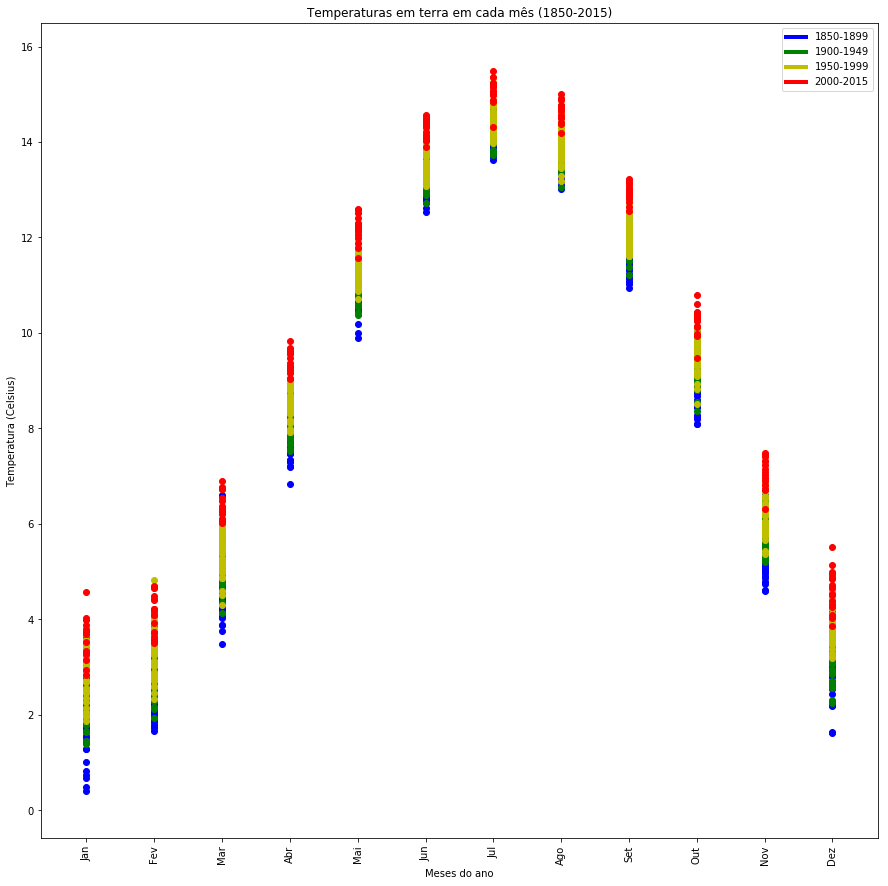

In [23]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots()
for i in range(len(df)):
    ax.scatter(df.loc[i]["Month"], df.loc[i]["LandAverageTemperature"], color=colors_dict[df.loc[i]["Year"]])
    ax.legend()
    
fig.set_figheight(15)
fig.set_figwidth(15)
    
legend_elements = [Line2D([0], [0], color=distinct_colors[0], lw=4, label='1850-1899'),
                   Line2D([0], [0], color=distinct_colors[1], lw=4, label='1900-1949'),
                   Line2D([0], [0], color=distinct_colors[2], lw=4, label='1950-1999'), 
                   Line2D([0], [0], color=distinct_colors[3], lw=4, label='2000-2015')]

plt.title("Temperaturas em terra em cada mês (1850-2015)")
plt.ylabel("Temperatura (Celsius)")
plt.xlabel("Meses do ano")
plt.legend(handles=legend_elements, loc=1)
plt.xticks(list(range(1, 13)), ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"], rotation=90)
plt.show()

Os dados acima apontam uma tendência de crescimento acentuado da temperatura terrestre a partir da metade do século X, tanto para temperaturas em terra quanto para medições feitas em terra e no oceano. 

Além disso, as medidas de máximo e mínimo mostram aumento também.


### Incerteza nas medições


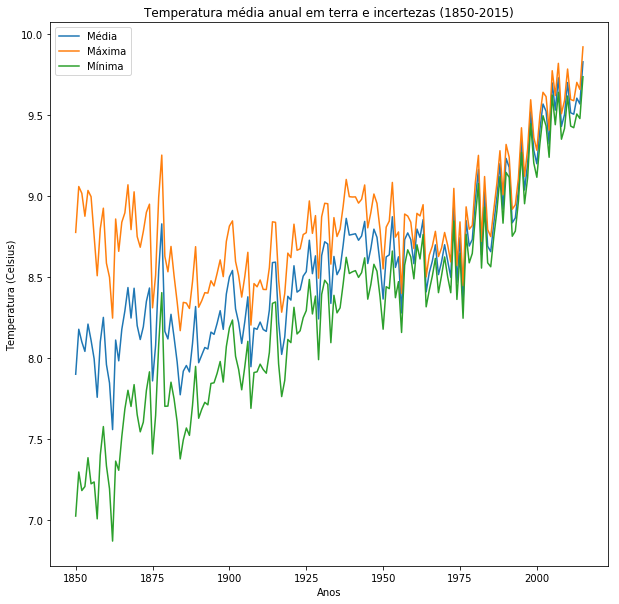

In [24]:
plt.figure(figsize=(10,10))
plt.title("Temperatura média anual em terra e incertezas (1850-2015)")
plt.ylabel("Temperatura (Celsius)")
plt.xlabel("Anos")
avg_line = plt.plot(df["Year"].unique(), df.groupby("Year").mean()["LandAverageTemperature"], label="Média")
max_line = plt.plot(df["Year"].unique(), df.groupby("Year").mean()["LandAverageTemperature"] + df.groupby("Year").mean()["LandAverageTemperatureUncertainty"], label="Máxima")
min_line = plt.plot(df["Year"].unique(), df.groupby("Year").mean()["LandAverageTemperature"] - df.groupby("Year").mean()["LandAverageTemperatureUncertainty"], label="Mínima")
plt.legend(handles=[avg_line[0], max_line[0], min_line[0]])
plt.show()

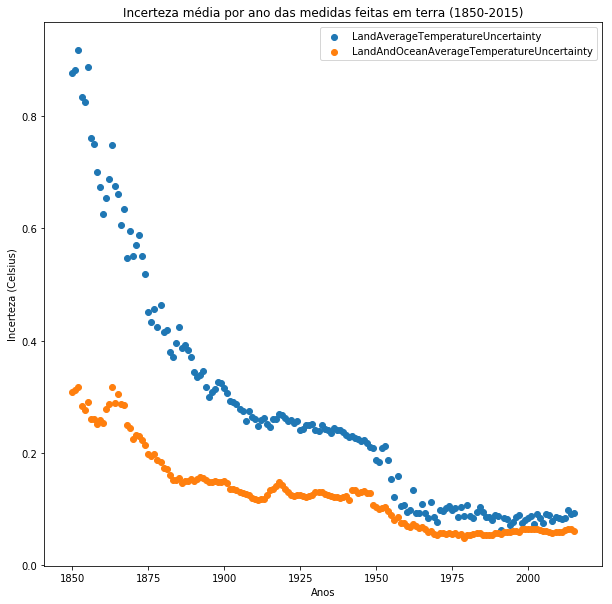

In [25]:
plt.figure(figsize=(10,10))
plt.title("Incerteza média por ano das medidas feitas em terra (1850-2015)")
plt.ylabel("Incerteza (Celsius)")
plt.xlabel("Anos")
plt.scatter(df["Year"].unique(), df.groupby("Year").mean()["LandAverageTemperatureUncertainty"])
plt.scatter(df["Year"].unique(), df.groupby("Year").mean()["LandAndOceanAverageTemperatureUncertainty"])
plt.legend()
plt.show()

Os gráficos mostram que ao longo dos anos a incerteza nas medidas foi diminuindo também e atualmente a média se encontra em menos de 0.2 graus Celsius. Como a média da incerteza se comporta ao longo de todo os anos, se mantendo sempre abaixo de 1 grau, ela será desconsiderada.

Além disso, os dados que incorporam medições do oceano serão removidos também. Como se nota a cima, a diferença entre as medidas médias de terra + ocean e somente terra diminuiram com o passar dos anos, porém variou aproximadamente 1 Celsius em 165 anos e sempre se manteve em torno de 6.5 graus ao longo desse período.

Os dados de temperatura máxima e mínima serão removidos também, pois pela análise, a média está corretamente representada no dataset.



In [26]:
df_train.drop(columns=['LandMinTemperature',
                 'LandMaxTemperature',
                 'LandAverageTemperatureUncertainty',
                 'LandMaxTemperatureUncertainty',
                 'LandMinTemperatureUncertainty',
                 'LandAndOceanAverageTemperature',
                 'LandAndOceanAverageTemperatureUncertainty'], 
        inplace=True)

df_test.drop(columns=['LandMinTemperature',
                 'LandMaxTemperature',
                 'LandAverageTemperatureUncertainty',
                 'LandMaxTemperatureUncertainty',
                 'LandMinTemperatureUncertainty',
                 'LandAndOceanAverageTemperature',
                 'LandAndOceanAverageTemperatureUncertainty'], 
        inplace=True)

df_val.drop(columns=['LandMinTemperature',
                 'LandMaxTemperature',
                 'LandAverageTemperatureUncertainty',
                 'LandMaxTemperatureUncertainty',
                 'LandMinTemperatureUncertainty',
                 'LandAndOceanAverageTemperature',
                 'LandAndOceanAverageTemperatureUncertainty'], 
        inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df_train

,LandAverageTemperature,Year,Month
0,0.749,1850,1
1,3.071,1850,2
2,4.954,1850,3
3,7.217,1850,4
4,10.004,1850,5
...,...,...,...
1795,14.348,1999,8
1796,12.723,1999,9
1797,9.997,1999,10
1798,6.592,1999,11


### Transformando dataset em série temporal

Antes do treinamento, é preciso converter a forma em que o dado está armazenado para um no qual o classificador consiga identificar os padrões presentes na sequência de temperatura e ser capaz de prever o padrão apresentando no futuro. Para isso, se utiliza o conceito de "look back", ou seja, quantas unidades de tempo (no caso do problema apresentado aqui, um mês) o modelo necessita do passado para prever a temperatura na próxima unidade.

Como bem se sabe (e o dado confirma isso),  a temperatura global, apesar de possuir flutuações, segue um ciclo anual. Tendo em vista isso, será usado um valor de look back de 12, ou seja, o modelo será treinado com amostras de 12 meses para prever a temperatura média do próximo mês.

Para isso, será utilizado um generator do keras.

In [28]:
from keras.preprocessing.sequence import TimeseriesGenerator

look_back = 12

train_generator = TimeseriesGenerator(df_train["LandAverageTemperature"], df_train["LandAverageTemperature"], length=look_back, batch_size=1)     
test_generator = TimeseriesGenerator(df_test["LandAverageTemperature"], df_test["LandAverageTemperature"], length=look_back, batch_size=1)
val_generator = TimeseriesGenerator(df_val["LandAverageTemperature"], df_val["LandAverageTemperature"], length=look_back, batch_size=1)


Using TensorFlow backend.


In [29]:
X_train = np.array([data[0][0] for data in train_generator])
y_train = np.array([data[1] for data in train_generator])

X_test = np.array([data[0][0] for data in test_generator])
y_test = np.array([data[1] for data in test_generator])

X_val = np.array([data[0][0] for data in val_generator])
y_val = np.array([data[1] for data in val_generator])

<h2>Modelo</h2><br>

In [30]:
from tensorflow.contrib import rnn
from sklearn.metrics import r2_score, mean_squared_error

In [31]:
n_features = 12

In [32]:
epochs = 50
n_classes = 1
n_units = 200
batch_size = 20

In [33]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, n_features])
y = tf.placeholder(tf.float32, [None, 1])

In [34]:
layer = {'weights': tf.Variable(tf.truncated_normal([n_units, n_classes], stddev=0.2), name="w_1"), 'bias': tf.Variable(tf.zeros(shape=[n_classes]))}

In [35]:
with tf.name_scope("LSTM"):
    x = tf.split(X, n_features, 1)

    lstm_cell = rnn.BasicLSTMCell(n_units)
    
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

with tf.name_scope("output"):
    output = tf.matmul(outputs[-1], layer['weights']) + layer['bias']


In [36]:
with tf.name_scope("loss"):
    logit = output
    cost = tf.reduce_mean(tf.keras.losses.MSE(output, y))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
    train_op = optimizer.minimize(cost)

with tf.name_scope("r2"):
    total_error = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y, output)))
    r_squared = tf.subtract(1.0, tf.div(unexplained_error, total_error))

In [37]:
def train():
    with tf.Session() as sess:

        tf.global_variables_initializer().run()
        tf.local_variables_initializer().run()
        
        losses_train = []
        losses_val = []
        
        for epoch in range(epochs):
            epoch_loss = 0

            i = 0
            for i in range(int(len(X_train) / batch_size)):

                start = i
                end = i + batch_size
                
                batch_x = X_train[start:end]
                batch_y = y_train[start:end]
                
                batch_x_val = X_val[start:end]
                batch_y_val = y_val[start:end]

                _, loss_train, r2 = sess.run([train_op, cost, r_squared], feed_dict={X: batch_x, y: batch_y})
                loss_val, r2_val = sess.run([cost, r_squared], feed_dict={X:batch_x_val, y:batch_y_val})
                
                losses_val.append(loss_val)
                losses_train.append(loss_train)
                
                i += batch_size


            print('Epoch', epoch + 1, 'de', epochs)
            print('Treino:\nLoss:', loss_train, 'R2:', r2)
            print('Validação:\nLoss:', loss_val, 'R2:', r2_val)
            print()

        prediction = sess.run(output, feed_dict={X:X_test})        
        return prediction, losses_val, losses_train

y_pred, losses_val, losses_train = train()

Epoch 1 de 50
Treino:
Loss: 0.123856604 R2: 0.9925122
Validação:
Loss: 0.11909531 R2: 0.99280006

Epoch 2 de 50
Treino:
Loss: 0.09426193 R2: 0.9943014
Validação:
Loss: 0.07411745 R2: 0.9955192

Epoch 3 de 50
Treino:
Loss: 0.15836653 R2: 0.9904259
Validação:
Loss: 0.095067754 R2: 0.9942527

Epoch 4 de 50
Treino:
Loss: 0.096008554 R2: 0.99419576
Validação:
Loss: 0.07299222 R2: 0.9955872

Epoch 5 de 50
Treino:
Loss: 0.079790846 R2: 0.9951762
Validação:
Loss: 0.087146685 R2: 0.99473155

Epoch 6 de 50
Treino:
Loss: 0.09869824 R2: 0.99403316
Validação:
Loss: 0.09183807 R2: 0.9944479

Epoch 7 de 50
Treino:
Loss: 0.058271337 R2: 0.9964772
Validação:
Loss: 0.08092083 R2: 0.9951079

Epoch 8 de 50
Treino:
Loss: 0.06867722 R2: 0.9958481
Validação:
Loss: 0.077092096 R2: 0.9953394

Epoch 9 de 50
Treino:
Loss: 0.06665263 R2: 0.9959705
Validação:
Loss: 0.08583934 R2: 0.9948106

Epoch 10 de 50
Treino:
Loss: 0.06411058 R2: 0.9961242
Validação:
Loss: 0.08467001 R2: 0.9948813

Epoch 11 de 50
Treino:
Loss:

<h2>Métricas</h2>

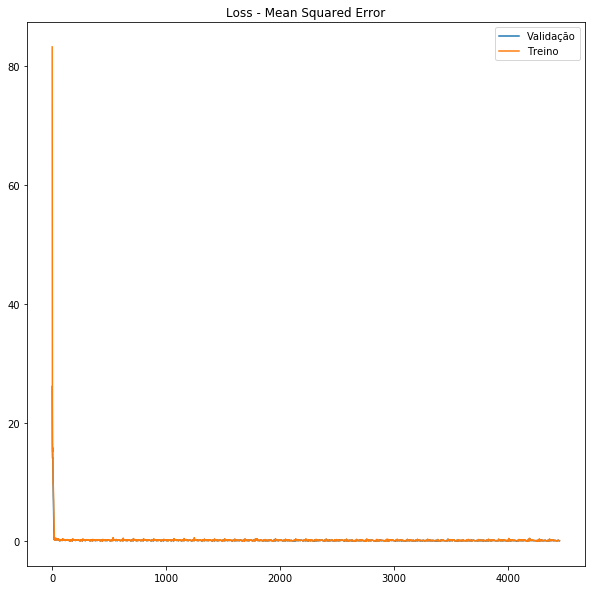

In [38]:
plt.figure(figsize=(10,10))
plt.title("Loss - Mean Squared Error")
plt.plot(losses_val, label="Validação")
plt.plot(losses_train, label="Treino")
plt.legend()
plt.show()

In [39]:
print('R2 score:', r2_score(y_test.ravel(), y_pred.ravel()))

R2 score: 0.9294201556257876


In [40]:
print('MSE:', mean_squared_error(y_test.ravel(), y_pred.ravel()))

MSE: 1.2024477931846738


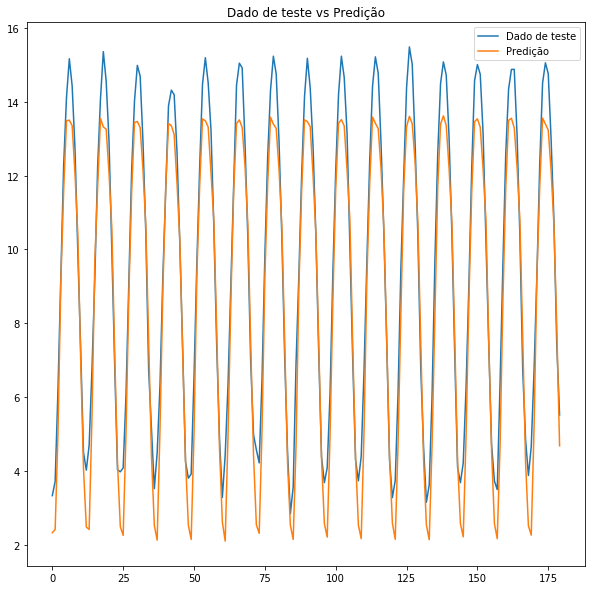

In [41]:
plt.figure(figsize=(10,10))
plt.title('Dado de teste vs Predição')
plt.plot(y_test, label="Dado de teste")
plt.plot(y_pred, label="Predição")
plt.legend()
plt.show()

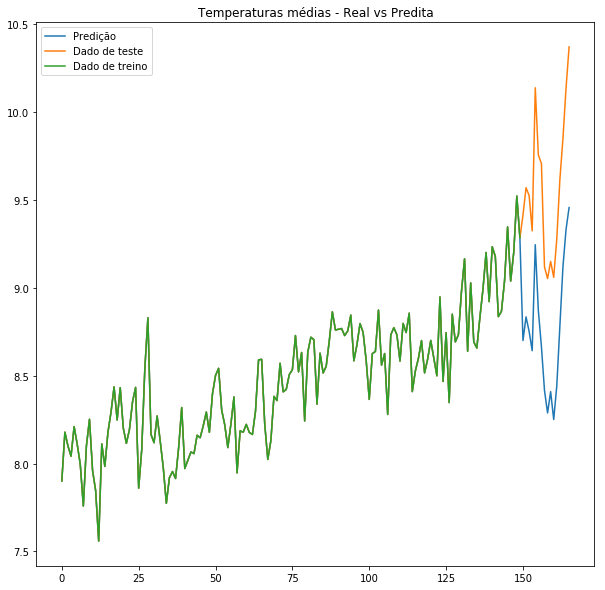

In [42]:
plt.figure(figsize=(10,10))
plt.title("Temperaturas médias - Real vs Predita")
plt.plot(np.concatenate([df_train.groupby("Year").mean()["LandAverageTemperature"].values, list(map(np.mean, np.array_split(y_pred.ravel(), 16)))]), label="Predição")
plt.plot(np.concatenate([df_train.groupby("Year").mean()["LandAverageTemperature"].values, list(map(np.mean, np.array_split(y_test.ravel(), 16)))]), label="Dado de teste")
plt.plot(df_train.groupby("Year").mean()["LandAverageTemperature"].values, label="Dado de treino")
plt.legend()
plt.show()

<h2>Conclusão</h2>

O modelo performou muito bem utilizando uma janela de 12 meses e sendo treinado apenas com a coluna de temperaturas médias. A previsão para os anos 2000 até 2015, como o gráfico que compara o dado de teste com a predição, está dentro de um limite aceitável, menor até em alguns pontos que a incerteza apresentada nas medidas. O último gráfico, apresentando as médias, também mostra o quão próximo os valores preditos estão da realidas, variando no máximo cerca de 1 grau.